In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbrn
from matplotlib import colors 
import statistics
from matplotlib.ticker import PercentFormatter 
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data=pd.read_csv('Temperature_2020.csv')
print('Imported data: \n',data.head())

Imported data: 
              STATION          STATION_NAME      DATE  TMAX  TMIN
0  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140101   339   239
1  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140102   228   167
2  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140103   245   154
3  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140104   239   144
4  GHCND:ASN00023013  PARAFIELD AIRPORT AS  20140105   232   142


In [4]:
print('Unique Stations : ',data['STATION'].unique())


Unique Stations :  ['GHCND:ASN00023013' 'GHCND:ASN00023122' 'GHCND:ASN00023842'
 'GHCND:ASN00023733' 'GHCND:ASN00023034' 'GHCND:ASN00023343'
 'GHCND:ASN00023090' 'GHCND:ASN00023887' 'GHCND:ASN00023885'
 'GHCND:ASN00023083' 'GHCND:ASN00023878']


**Choosing STATION GHCND:ASN00023887**

In [5]:
df=data.loc[data['STATION'] == 'GHCND:ASN00023887']
print('Data of Station GHCND:ASN00023887:\n ',df.describe())

Data of Station GHCND:ASN00023887:
                 DATE         TMAX        TMIN
count  4.270000e+02   427.000000  427.000000
mean   2.014205e+07   183.620609  112.611241
std    3.366451e+03   499.123030   43.459751
min    2.014010e+07 -9999.000000   13.000000
25%    2.014042e+07   150.000000   85.000000
50%    2.014080e+07   197.000000  107.000000
75%    2.014112e+07   248.500000  134.000000
max    2.015030e+07   414.000000  277.000000


In [6]:
print('TMAX mean: ',df['TMAX'].mean())
print('TMIN mean: ',df['TMIN'].mean())
print('TMAX mode: ',statistics.mode(df['TMAX']))
print('TMIN mode: ',df['TMIN'].mode())
print('TMAX median: ',df['TMAX'].median())
print('TMIN median: ',df['TMIN'].median())

TMAX mean:  183.62060889929742
TMIN mean:  112.6112412177986
TMAX mode:  202
TMIN mode:  0    106
1    117
dtype: int64
TMAX median:  197.0
TMIN median:  107.0


In [7]:
count_unacceptable_value=0;
for i in df['TMAX']:
  if(i<0):
    count_unacceptable_value+=1;
print(count_unacceptable_value)

1


###**As can be seen from the describe function used above**
*   TMAX has max=414 and min=-9999 
*   TMIN has max=277 and min=13 
*   TMIN has two modes i.e. two values occur with same frequency 106 & 117 

Here, we can see that in TMAX the value -9999 acts as an outlier so to get more clear understanding of the data it is valid to either drop the row or may be change to the mean value. (for this experiment later approach is used) Hence, none of the other values except the minimum of TMAX will change.

In [8]:
df.dropna();
mx_mean=df['TMAX'].mean()
mn_mean=df['TMIN'].mean()
pd.set_option('mode.chained_assignment',None)
#REPLACING THE OUTLIER AND THE UNACCEPTED VALUES(LIKE NEGATIVE FOR TEMPERATURE IN KELVIN) WITH THE MEAN OBTAINED
df['TMAX'] = df['TMAX'].apply(lambda x : mx_mean if x <0 else x)
df['TMIN'] = df['TMIN'].apply(lambda x : mn_mean if x <0 else x)
print('\n\nData after replacing negative values with mean:\n ',df.describe());



Data after replacing negative values with mean:
                 DATE        TMAX        TMIN
count  4.270000e+02  427.000000  427.000000
mean   2.014205e+07  207.467496  112.611241
std    3.366451e+03   71.833014   43.459751
min    2.014010e+07   83.000000   13.000000
25%    2.014042e+07  150.000000   85.000000
50%    2.014080e+07  197.000000  107.000000
75%    2.014112e+07  248.500000  134.000000
max    2.015030e+07  414.000000  277.000000


**In the following cell the normalized frequency represents the value of the ratio of frequency of that bin with respect to total number of observations(=427). For the graphs in the following cell the summation of all the heights of histogram comes out to be 1.**



-------------------------------BINS= 5---------------------------------
   BinsTMAX   FreqTMAX  NormFreqTMAX  BinsTMIN   FreqTMIN  NormFreqTMIN
0       83.0     105.0      0.245902       13.0      54.0      0.126464
1      149.2     159.0      0.372365       65.8     209.0      0.489461
2      215.4      93.0      0.217799      118.6     124.0      0.290398
3      281.6      47.0      0.110070      171.4      29.0      0.067916
4      347.8      23.0      0.053864      224.2      11.0      0.025761
5      414.0       NaN           NaN      277.0       NaN           NaN


-------------------------------BINS= 12---------------------------------
     BinsTMAX   FreqTMAX  NormFrequencyTMAX  BinsTMIN   FreqTMIN  NormFreqTMIN
0    83.000000      19.0           0.044496       13.0       4.0      0.009368
1   110.583333      58.0           0.135831       35.0      29.0      0.067916
2   138.166667      53.0           0.124122       57.0      55.0      0.128806
3   165.750000      75.0       

<Figure size 432x288 with 0 Axes>

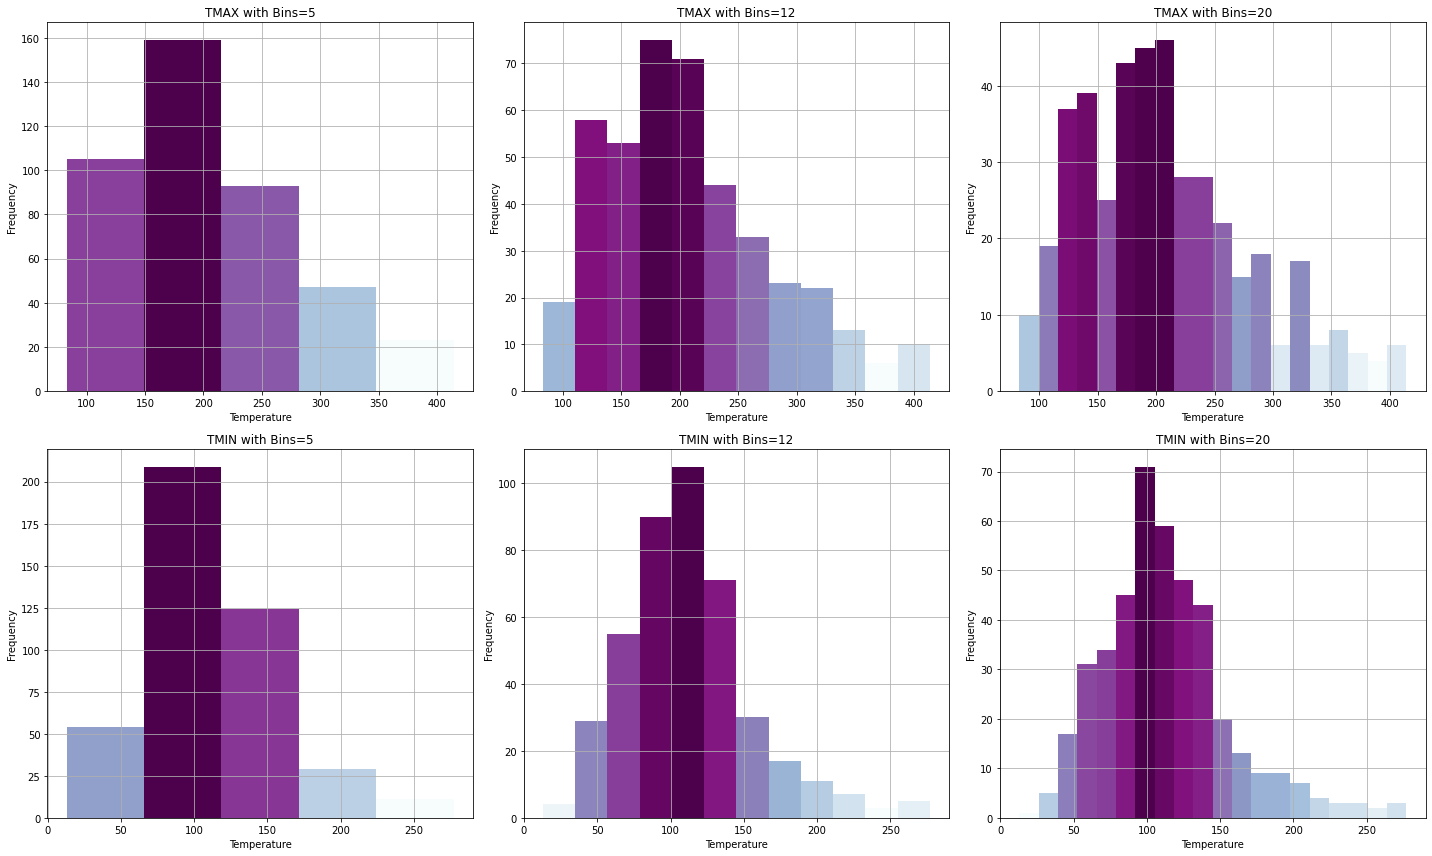

<Figure size 432x288 with 0 Axes>

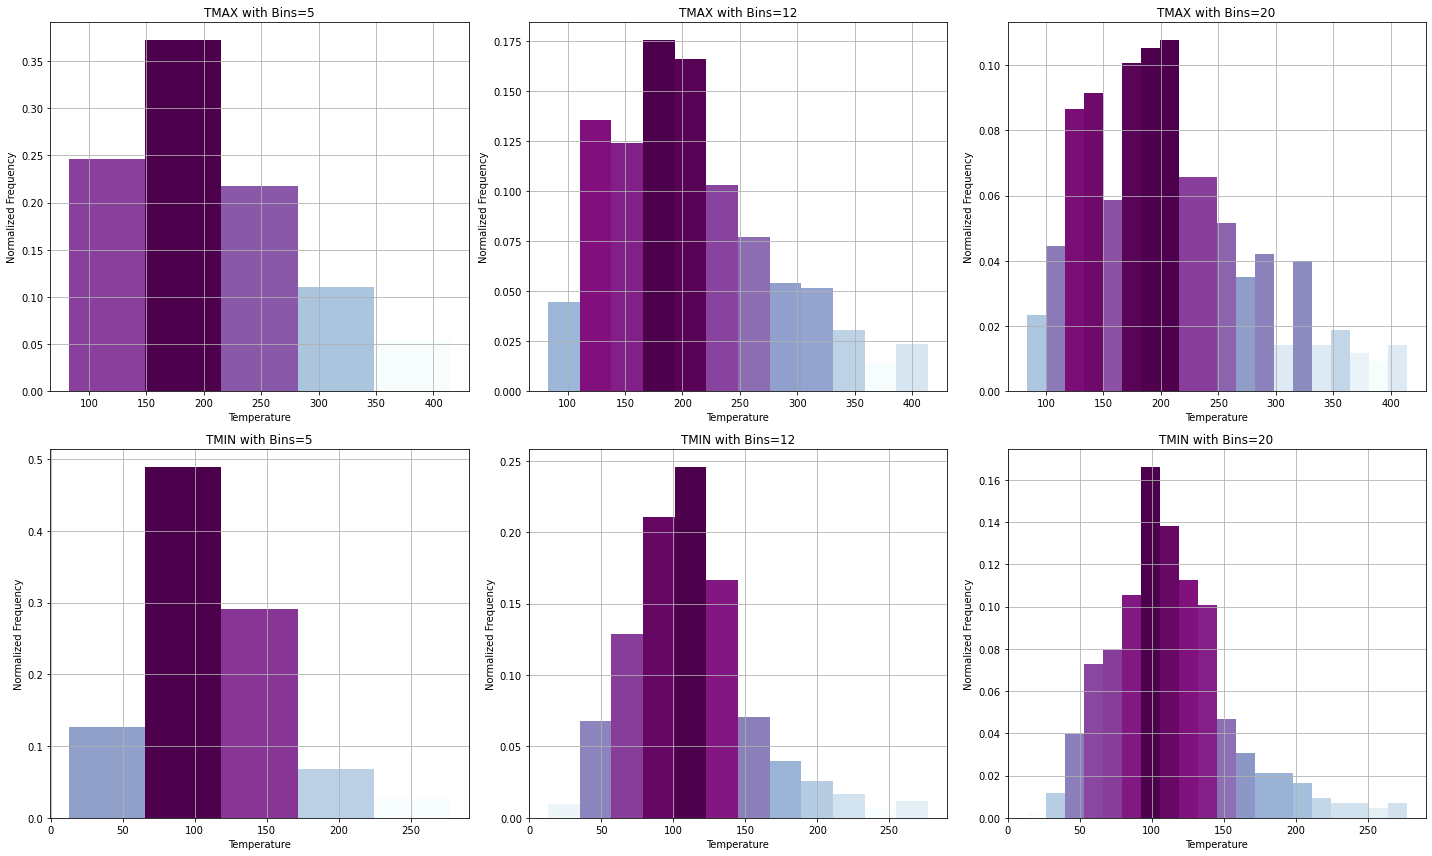

In [18]:
tmax=df['TMAX']
# The leftmost and rightmost bin edges
first_edge, last_edge = tmax.min(), tmax.max()

weight=[1 ,len(tmax)];
ylabel=['Normalized Frequency' , 'Frequency']

for w in weight:
  n_equal_bin = 5  # Number of bins
  freqMX , binsMX= np.histogram(tmax,bins=n_equal_bin) #getting the frequencies of various bins
  norm_freqMX=pd.Series(freqMX/freqMX.sum())#normalizing the frequencies
  freqMX=pd.Series(freqMX)
  binsMX=pd.Series(binsMX)
  fig = plt.figure()
  fig, axs = plt.subplots(2, 3,figsize =(20, 12),tight_layout = True) 
  N, bins, patches=axs[0][0].hist(tmax, bins=binsMX,weights=np.zeros_like(tmax) + 1. / w)
  bars = ((N**(1 / 5)) / N.max()) 
  bar = colors.Normalize(bars.min(), bars.max())   
  for i, thisbar in zip(bars, patches): 
      division = plt.cm.BuPu(bar(i)) 
      thisbar.set_facecolor(division) 
  axs[0][0].set_xlabel('Temperature')
  axs[0][0].set_ylabel(ylabel[int(1./w)]);
  axs[0][0].set_title('TMAX with Bins=5')
  axs[0][0].grid()



  n_equal_bin = 12  # Number of bins
  freqMX2 , binsMX2= np.histogram(tmax,bins=n_equal_bin) #getting the frequencies of various bins
  norm_freqMX2=pd.Series(freqMX2/freqMX2.sum())#normalizing the frequencies
  freqMX2=pd.Series(freqMX2)
  binsMX2=pd.Series(binsMX2)
  N, bins, patches=axs[0][1].hist(tmax, bins=binsMX2,weights=np.zeros_like(tmax) + 1. / w)
  bars = ((N**(1 / 5)) / N.max()) 
  bar = colors.Normalize(bars.min(), bars.max())   
  for i, thisbar in zip(bars, patches): 
      division = plt.cm.BuPu(bar(i)) 
      thisbar.set_facecolor(division)  
  axs[0][1].set_xlabel('Temperature')
  axs[0][1].set_ylabel(ylabel[int(1./w)]);
  axs[0][1].set_title('TMAX with Bins=12')
  axs[0][1].grid()



  n_equal_bin = 20  # Number of bins
  freqMX3 , binsMX3= np.histogram(tmax,bins=n_equal_bin) #getting the frequencies of various bins
  norm_freqMX3=pd.Series(freqMX3/freqMX3.sum())#normalizing the frequencies
  freqMX3=pd.Series(freqMX3)
  binsMX3=pd.Series(binsMX3)
  N, bins, patches=axs[0][2].hist(tmax, bins=binsMX3,weights=np.zeros_like(tmax) + 1. / w)
  bars = ((N**(1 / 5)) / N.max()) 
  bar = colors.Normalize(bars.min(), bars.max())   
  for i, thisbar in zip(bars, patches): 
      division = plt.cm.BuPu(bar(i)) 
      thisbar.set_facecolor(division) 
  axs[0][2].set_xlabel('Temperature')
  axs[0][2].set_ylabel(ylabel[int(1./w)]);
  axs[0][2].set_title('TMAX with Bins=20')
  axs[0][2].grid()



  #FOR TMIN
  tmin=df['TMIN']
  # The leftmost and rightmost bin edges
  first_edge, last_edge = tmin.min(), tmin.max()


  n_equal_bin = 5  # Number of bins
  freqMI , binsMI= np.histogram(tmin,bins=n_equal_bin) #getting the frequencies of various bins
  norm_freqMI=pd.Series(freqMI/freqMI.sum())#normalizing the frequencies
  freqMI=pd.Series(freqMI)
  binsMI=pd.Series(binsMI)
  N, bins, patches=axs[1][0].hist(tmin, bins=binsMI,weights=np.zeros_like(tmax) + 1. / w)
  bars = ((N**(1 / 5)) / N.max()) 
  bar = colors.Normalize(bars.min(), bars.max())   
  for i, thisbar in zip(bars, patches): 
      division = plt.cm.BuPu(bar(i)) 
      thisbar.set_facecolor(division) 
  axs[1][0].set_xlabel('Temperature')
  axs[1][0].set_ylabel(ylabel[int(1./w)]);
  axs[1][0].set_title('TMIN with Bins=5')
  axs[1][0].grid()



  n_equal_bin = 12  # Number of bins
  freqMI2 , binsMI2= np.histogram(tmin,bins=n_equal_bin) #getting the frequencies of various bins
  norm_freqMI2=pd.Series(freqMI2/freqMI2.sum())#normalizing the frequencies
  freqMI2=pd.Series(freqMI2)
  binsMI2=pd.Series(binsMI2)
  N, bins, patches=axs[1][1].hist(tmin, bins=binsMI2,weights=np.zeros_like(tmax) + 1. / w)
  bars = ((N**(1 / 5)) / N.max()) 
  bar = colors.Normalize(bars.min(), bars.max())   
  for i, thisbar in zip(bars, patches): 
      division = plt.cm.BuPu(bar(i)) 
      thisbar.set_facecolor(division) 
  axs[1][1].set_xlabel('Temperature')
  axs[1][1].set_ylabel(ylabel[int(1./w)]);
  axs[1][1].set_title('TMIN with Bins=12')
  axs[1][1].grid()




  n_equal_bin = 20  # Number of bins
  freqMI3 , binsMI3= np.histogram(tmin,bins=n_equal_bin) #getting the frequencies of various bins
  norm_freqMI3=pd.Series(freqMI3/freqMI3.sum())#normalizing the frequencies
  freqMI3=pd.Series(freqMI3)
  binsMI3=pd.Series(binsMI3)
  N, bins, patches=axs[1][2].hist(tmin, bins=binsMI3,weights=np.zeros_like(tmax) + 1. / w)
  bars = ((N**(1 / 5)) / N.max()) 
  bar = colors.Normalize(bars.min(), bars.max())   
  for i, thisbar in zip(bars, patches): 
      division = plt.cm.BuPu(bar(i)) 
      thisbar.set_facecolor(division) 
  axs[1][2].set_xlabel('Temperature')
  axs[1][2].set_ylabel(ylabel[int(1./w)]);
  axs[1][2].set_title('TMIN with Bins=20')
  axs[1][2].grid()




#PRINTING VALUES OF BIN RANGE , FREQUENCY AND THE CORRESPONDING NORMALIZED FREQUENCY
print("\n\n-------------------------------BINS= 5---------------------------------")
frame={'BinsTMAX ':binsMX,'FreqTMAX':freqMX,'NormFreqTMAX': norm_freqMX ,'BinsTMIN ':binsMI,'FreqTMIN':freqMI,'NormFreqTMIN': norm_freqMI }
norm_data=pd.DataFrame(frame)
print(norm_data)
print("\n\n-------------------------------BINS= 12---------------------------------")
frame={'BinsTMAX ':binsMX2,'FreqTMAX':freqMX2,'NormFrequencyTMAX': norm_freqMX2 ,'BinsTMIN ':binsMI2,'FreqTMIN':freqMI2,'NormFreqTMIN': norm_freqMI2 }
norm_data2=pd.DataFrame(frame)
print(norm_data2)
print("\n\n-------------------------------BINS= 20---------------------------------")
frame={'BinsTMAX ':binsMX3,'FreqTMAX':freqMX3,'NormFrequencyTMAX': norm_freqMX3 ,'BinsTMIN ':binsMI3,'FreqTMIN':freqMI3,'NormFreqTMIN': norm_freqMI3 }
norm_data2=pd.DataFrame(frame)
print(norm_data2)
